In [1]:
import polars as pl

METRICS_PATH = "results/metric_scores.json"

df = pl.read_json(METRICS_PATH)
df

item_index,model_name,prompt_variant,context_condition,question,gold_answer,context,documents,system_prompt,user_prompt,model_answer,reference_answers,rougeL_precision,rougeL_recall,bleu,bert_score_precision,bert_score_recall
i64,str,str,str,str,str,str,list[struct[2]],str,str,str,list[str],f64,f64,f64,f64,f64
0,"""llama2:7b""","""langchain_base""","""relevant_only""","""What is the primary function o…","""The mitochondria produce ATP a…","""Mitochondria are membrane-boun…","[{""Mitochondria are membrane-bound organelles responsible for producing ATP, the cell's main energy currency."",""relevant""}, {""Cells rely on mitochondria to convert nutrients into usable energy through the process of oxidative phosphorylation."",""relevant""}, {""The mitochondria support cellular respiration, enabling the cell to perform functions requiring energy."",""relevant""}]","""You are an assistant for quest…","""Use the following pieces of re…","""Mitochondria's primary functio…","[""The mitochondria produce ATP and serve as the cell’s primary source of energy.""]",0.272727,0.214286,0.443802,0.39534,0.525854
0,"""llama2:7b""","""langchain_system""","""relevant_only""","""What is the primary function o…","""The mitochondria produce ATP a…","""Mitochondria are membrane-boun…","[{""Mitochondria are membrane-bound organelles responsible for producing ATP, the cell's main energy currency."",""relevant""}, {""Cells rely on mitochondria to convert nutrients into usable energy through the process of oxidative phosphorylation."",""relevant""}, {""The mitochondria support cellular respiration, enabling the cell to perform functions requiring energy."",""relevant""}]","""You are an assistant for quest…",null,"""The primary function of the mi…","[""The mitochondria produce ATP and serve as the cell’s primary source of energy.""]",0.25,0.285714,0.476672,0.461514,0.58103
0,"""llama2:7b""","""langchain_user""","""relevant_only""","""What is the primary function o…","""The mitochondria produce ATP a…","""Mitochondria are membrane-boun…","[{""Mitochondria are membrane-bound organelles responsible for producing ATP, the cell's main energy currency."",""relevant""}, {""Cells rely on mitochondria to convert nutrients into usable energy through the process of oxidative phosphorylation."",""relevant""}, {""The mitochondria support cellular respiration, enabling the cell to perform functions requiring energy."",""relevant""}]",null,"""You are an assistant for quest…","""The primary function of mitoch…","[""The mitochondria produce ATP and serve as the cell’s primary source of energy.""]",0.347826,0.571429,0.394444,0.427413,0.619366
0,"""llama2:7b""","""llamaindex_base""","""relevant_only""","""What is the primary function o…","""The mitochondria produce ATP a…","""Mitochondria are membrane-boun…","[{""Mitochondria are membrane-bound organelles responsible for producing ATP, the cell's main energy currency."",""relevant""}, {""Cells rely on mitochondria to convert nutrients into usable energy through the process of oxidative phosphorylation."",""relevant""}, {""The mitochondria support cellular respiration, enabling the cell to perform functions requiring energy."",""relevant""}]","""If you don't know the answer, …","""We have provided context infor…","""The primary function of mitoch…","[""The mitochondria produce ATP and serve as the cell’s primary source of energy.""]",0.266667,0.285714,0.466481,0.449255,0.573878
0,"""llama2:7b""","""llamaindex_system""","""relevant_only""","""What is the primary function o…","""The mitochondria produce ATP a…","""Mitochondria are membrane-boun…","[{""Mitochondria are membrane-bound organelles responsible for producing ATP, the cell's main energy currency."",""relevant""}, {""Cells rely on mitochondria to convert nutrients into usable energy through the process of oxidative phosphorylation."",""relevant""}, {""The mitochondria support cellular respiration, enabling the cell to perform functions requiring energy."",""relevant""}]",

In [5]:
import polars.selectors as cs
from great_tables import GT

pl_metrics = df.select(
    "rougeL_precision", "rougeL_recall", "bleu", "bert_score_precision", "bert_score_recall"
).head()
pl_metrics

rougeL_precision,rougeL_recall,bleu,bert_score_precision,bert_score_recall
f64,f64,f64,f64,f64
0.272727,0.214286,0.443802,0.39534,0.525854
0.25,0.285714,0.476672,0.461514,0.58103
0.347826,0.571429,0.394444,0.427413,0.619366
0.266667,0.285714,0.466481,0.449255,0.573878
0.25,0.285714,0.476672,0.461514,0.58103


In [6]:
gt_metrics = GT(pl_metrics)
gt_metrics

rougeL_precision,rougeL_recall,bleu,bert_score_precision,bert_score_recall
0.2727272727272727,0.21428571428571427,0.4438024762568004,0.39533963799476624,0.5258544087409973
0.25,0.2857142857142857,0.4766721496823367,0.46151405572891235,0.5810304880142212
0.34782608695652173,0.5714285714285714,0.39444427049850744,0.42741265892982483,0.6193656921386719
0.26666666666666666,0.2857142857142857,0.4664811893063933,0.4492548704147339,0.5738778114318848
0.25,0.2857142857142857,0.4766721496823367,0.46151405572891235,0.5810304880142212


In [8]:
print(gt_metrics.as_latex())

\begin{table}[!t]


\fontsize{12.0pt}{14.4pt}\selectfont

\begin{tabular*}{\linewidth}{@{\extracolsep{\fill}}rrrrr}
\toprule
rougeL\_precision & rougeL\_recall & bleu & bert\_score\_precision & bert\_score\_recall \\ 
\midrule\addlinespace[2.5pt]
0.2727272727272727 & 0.21428571428571427 & 0.4438024762568004 & 0.39533963799476624 & 0.5258544087409973 \\
0.25 & 0.2857142857142857 & 0.4766721496823367 & 0.46151405572891235 & 0.5810304880142212 \\
0.34782608695652173 & 0.5714285714285714 & 0.39444427049850744 & 0.42741265892982483 & 0.6193656921386719 \\
0.26666666666666666 & 0.2857142857142857 & 0.4664811893063933 & 0.4492548704147339 & 0.5738778114318848 \\
0.25 & 0.2857142857142857 & 0.4766721496823367 & 0.46151405572891235 & 0.5810304880142212 \\
\bottomrule
\end{tabular*}

\end{table}



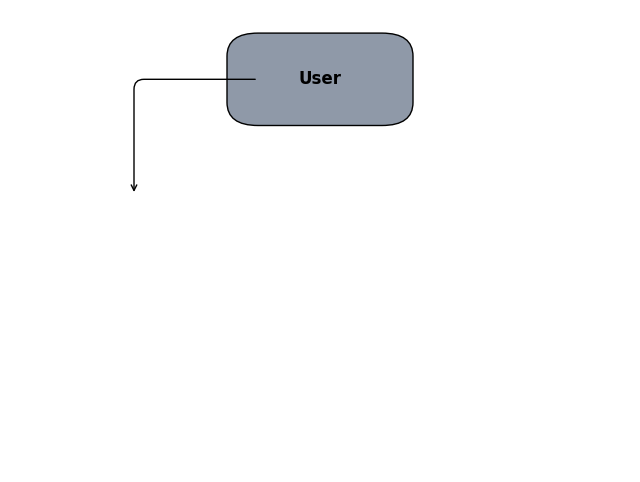

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(8, 6))

# 1. Create a Fancy Box (The User Icon box)
# (xy) is the bottom left corner
box = patches.FancyBboxPatch((0.4, 0.8), 0.2, 0.1, 
                             boxstyle="round,pad=0.05", 
                             ec="black", fc="#8f99a8")
ax.add_patch(box)

# 2. Add Text
ax.text(0.5, 0.85, "User", ha="center", va="center", fontsize=12, fontweight='bold')

# 3. Draw an arrow
ax.annotate("", xy=(0.2, 0.6), xytext=(0.4, 0.85),
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))

# Clean up chart junk
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

plt.show()